In [136]:
# OPENING CSV

import numpy as np
import pandas as pd 

data = pd.read_csv(r'/Users/anabautistamartin/Data Science and Machine Learning/PROJECT/dataset.csv',sep=';',header=None, decimal=',')

# NAMING COLUMNS
data.columns = ['version', 'item', 'ms', 'lang', 'expo', 'pref', 'use', 'profic', 'grupo', 'orden', 'contextlab1', 'contextlab2']
print(data)

      version  item          ms  lang  expo  pref       use  profic  grupo  \
0           1    76  110.037736     0  0.90  0.50  0.875000   1.000      0   
1           1    76   92.905660     0  0.80  0.50  0.806250   0.900      0   
2           1    76   84.207547     0  0.50  0.60  0.912500   0.950      0   
3           1    76   63.169811     0  0.95  0.90  0.887500   0.900      0   
4           1    76   62.452830     0  0.60  0.70  0.787500   1.000      0   
...       ...   ...         ...   ...   ...   ...       ...     ...    ...   
7520        0    69   62.932584     1  0.45  0.35  0.361429   0.850      1   
7521        0    69  185.112360     1  0.02  0.30  0.050000   0.925      1   
7522        0    69  128.617977     1  0.10  0.40  0.014286   0.775      1   
7523        0    69   74.932584     1  0.60  0.60  0.556250   1.000      1   
7524        0    69   84.865169     1  0.30  0.25  0.234286   0.975      1   

      orden  contextlab1  contextlab2  
0         0            

In [137]:
# REORGANIZING COLUMNS
data = data.reindex(columns=['profic', 'item', 'ms', 'lang', 'expo', 'pref', 'use', 'grupo', 'orden', 'contextlab1', 'contextlab2', 'version'])
print(data)

# RENAMING 'PROFIC' AS 'Y'
data.rename(columns = {'profic':'predict'}, inplace = True)
print(data)

      profic  item          ms  lang  expo  pref       use  grupo  orden  \
0      1.000    76  110.037736     0  0.90  0.50  0.875000      0      0   
1      0.900    76   92.905660     0  0.80  0.50  0.806250      0      0   
2      0.950    76   84.207547     0  0.50  0.60  0.912500      0      0   
3      0.900    76   63.169811     0  0.95  0.90  0.887500      0      0   
4      1.000    76   62.452830     0  0.60  0.70  0.787500      0      0   
...      ...   ...         ...   ...   ...   ...       ...    ...    ...   
7520   0.850    69   62.932584     1  0.45  0.35  0.361429      1      1   
7521   0.925    69  185.112360     1  0.02  0.30  0.050000      1      1   
7522   0.775    69  128.617977     1  0.10  0.40  0.014286      1      1   
7523   1.000    69   74.932584     1  0.60  0.60  0.556250      1      1   
7524   0.975    69   84.865169     1  0.30  0.25  0.234286      1      1   

      contextlab1  contextlab2  version  
0               0            0        1  
1  

In [138]:
# ONE-HOT-ENCODING FOR 'ITEM'
from sklearn.preprocessing import OneHotEncoder

dummies_item = pd.get_dummies(data['item'])
print(dummies_item)

dataset = pd.merge(
    left=data,
    right=dummies_item,
    left_index=True,
    right_index=True,
)
print(dataset)

      1    2    3    4    5    6    7    8    9    10   ...  136  137  138  \
0       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7520    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
7521    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
7522    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
7523    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
7524    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      140  141  142  143  144  145  146  
0       0    0    0  

In [139]:
# DELETING COLUMN 'ITEM' AFTER ONE-HOT-ENCODING
del dataset['item']

In [140]:
# CHECKING
print(dataset)

      predict          ms  lang  expo  pref       use  grupo  orden  \
0       1.000  110.037736     0  0.90  0.50  0.875000      0      0   
1       0.900   92.905660     0  0.80  0.50  0.806250      0      0   
2       0.950   84.207547     0  0.50  0.60  0.912500      0      0   
3       0.900   63.169811     0  0.95  0.90  0.887500      0      0   
4       1.000   62.452830     0  0.60  0.70  0.787500      0      0   
...       ...         ...   ...   ...   ...       ...    ...    ...   
7520    0.850   62.932584     1  0.45  0.35  0.361429      1      1   
7521    0.925  185.112360     1  0.02  0.30  0.050000      1      1   
7522    0.775  128.617977     1  0.10  0.40  0.014286      1      1   
7523    1.000   74.932584     1  0.60  0.60  0.556250      1      1   
7524    0.975   84.865169     1  0.30  0.25  0.234286      1      1   

      contextlab1  contextlab2  ...  136  137  138  140  141  142  143  144  \
0               0            0  ...    0    0    0    0    0    0   

In [142]:
# NORMALIZING 'MS' BECAUSE IT HAS A WEIRD RANGE

from sklearn.preprocessing import MinMaxScaler 

dataset['ms'] = MinMaxScaler().fit_transform(np.array(dataset['ms']).reshape(-1,1)) 
  
print(dataset['ms'])
print(dataset)

0       0.227130
1       0.187630
2       0.167576
3       0.119072
4       0.117419
          ...   
7520    0.118525
7521    0.400220
7522    0.269968
7523    0.146192
7524    0.169092
Name: ms, Length: 7525, dtype: float64
      predict        ms  lang  expo  pref       use  grupo  orden  \
0       1.000  0.227130     0  0.90  0.50  0.875000      0      0   
1       0.900  0.187630     0  0.80  0.50  0.806250      0      0   
2       0.950  0.167576     0  0.50  0.60  0.912500      0      0   
3       0.900  0.119072     0  0.95  0.90  0.887500      0      0   
4       1.000  0.117419     0  0.60  0.70  0.787500      0      0   
...       ...       ...   ...   ...   ...       ...    ...    ...   
7520    0.850  0.118525     1  0.45  0.35  0.361429      1      1   
7521    0.925  0.400220     1  0.02  0.30  0.050000      1      1   
7522    0.775  0.269968     1  0.10  0.40  0.014286      1      1   
7523    1.000  0.146192     1  0.60  0.60  0.556250      1      1   
7524    0.975  

In [143]:
# SEPARATING COLUMN 'Y'

tags = dataset["predict"]
print(tags)

variables = dataset
del variables['predict']
print(variables)

0       1.000
1       0.900
2       0.950
3       0.900
4       1.000
        ...  
7520    0.850
7521    0.925
7522    0.775
7523    1.000
7524    0.975
Name: predict, Length: 7525, dtype: float64
            ms  lang  expo  pref       use  grupo  orden  contextlab1  \
0     0.227130     0  0.90  0.50  0.875000      0      0            0   
1     0.187630     0  0.80  0.50  0.806250      0      0            0   
2     0.167576     0  0.50  0.60  0.912500      0      0            0   
3     0.119072     0  0.95  0.90  0.887500      0      0            0   
4     0.117419     0  0.60  0.70  0.787500      0      0            0   
...        ...   ...   ...   ...       ...    ...    ...          ...   
7520  0.118525     1  0.45  0.35  0.361429      1      1            1   
7521  0.400220     1  0.02  0.30  0.050000      1      1            1   
7522  0.269968     1  0.10  0.40  0.014286      1      1            1   
7523  0.146192     1  0.60  0.60  0.556250      1      1            1   

In [144]:
# SEPARATING TRAIN AND TEST SETS
# 80% training and 20% testing

import sklearn as sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(variables,tags, test_size=0.2)

print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(np.shape(X_train))
print(np.shape(y_train))

            ms  lang  expo  pref       use  grupo  orden  contextlab1  \
1094  0.172108     0  0.80  0.45  0.928571      0      0            0   
6794  0.065617     0  0.15  0.05  0.171429      1      1            1   
1827  0.120794     0  0.80  1.00  0.912500      0      0            1   
3893  0.083419     1  0.30  0.30  0.362500      1      0            1   
2367  0.056094     0  0.20  0.25  0.164286      1      0            0   
...        ...   ...   ...   ...       ...    ...    ...          ...   
4526  0.086175     1  0.07  0.00  0.062500      1      0            1   
7260  0.176660     0  0.40  0.50  0.312500      1      1            1   
6387  0.122640     1  0.40  0.10  0.325000      1      1            1   
5994  0.169360     0  0.90  0.70  0.781250      1      1            0   
3243  0.096724     1  0.40  0.30  0.350000      1      0            0   

      contextlab2  version  ...  136  137  138  140  141  142  143  144  145  \
1094            1        0  ...    0    0  

In [145]:
# CREATING THE MODEL

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 40
epochs = 200

model = Sequential() 
model.add(Dense(86, activation='relu', input_shape=(None, 155)))
model.add(Dense(86, activation='relu'))
model.add(Dropout(0.2)) # i.e., 20% of neurons pruned
model.add(Dense(86, activation='relu'))
model.add(Dense(86, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(160, activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(160, activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(86, activation='relu'))
model.add(Dense(86, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(86, activation='relu'))
model.add(Dense(1,activation='linear'))
          
model.summary() 

model.compile(optimizer='adam',loss='mean_squared_error',metrics='MeanSquaredError')

history = model.fit(X_train, y_train,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=1, 
                    validation_data=(X_test, y_test))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_208 (Dense)           (None, None, 86)          13416     
                                                                 
 dense_209 (Dense)           (None, None, 86)          7482      
                                                                 
 dropout_91 (Dropout)        (None, None, 86)          0         
                                                                 
 dense_210 (Dense)           (None, None, 86)          7482      
                                                                 
 dense_211 (Dense)           (None, None, 86)          7482      
                                                                 
 dropout_92 (Dropout)        (None, None, 86)          0         
                                                                 
 dense_212 (Dense)           (None, None, 120)       

151/151 [==============================] - 1s 5ms/step - loss: 6.5575e-04 - mean_squared_error: 6.5575e-04 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 73/200
151/151 [==============================] - 1s 4ms/step - loss: 6.8590e-04 - mean_squared_error: 6.8590e-04 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 74/200
151/151 [==============================] - 1s 5ms/step - loss: 8.1595e-04 - mean_squared_error: 8.1595e-04 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 75/200
151/151 [==============================] - 1s 4ms/step - loss: 8.7097e-04 - mean_squared_error: 8.7097e-04 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 76/200
151/151 [==============================] - 1s 4ms/step - loss: 7.1999e-04 - mean_squared_error: 7.1999e-04 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 77/200
151/151 [==============================] - 1s 5ms/step - loss: 6.1780e-04 - mean_squared_error: 6.1780e-04 - val_loss: 0.0024 - val_mean_squ

151/151 [==============================] - 1s 5ms/step - loss: 4.0871e-04 - mean_squared_error: 4.0871e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 167/200
151/151 [==============================] - 1s 5ms/step - loss: 5.2756e-04 - mean_squared_error: 5.2756e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 168/200
151/151 [==============================] - 1s 5ms/step - loss: 4.4437e-04 - mean_squared_error: 4.4437e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 169/200
151/151 [==============================] - 1s 5ms/step - loss: 3.0997e-04 - mean_squared_error: 3.0997e-04 - val_loss: 9.8396e-04 - val_mean_squared_error: 9.8396e-04
Epoch 170/200
151/151 [==============================] - 1s 5ms/step - loss: 2.7736e-04 - mean_squared_error: 2.7736e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 171/200
151/151 [==============================] - 1s 5ms/step - loss: 7.9193e-04 - mean_squared_error: 7.9193e-04 - val_loss: 0.0014 -

In [146]:
#EVALUATION
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
print('Test loss:', score[0])
print('Mean squared error:', score[1])

48/48 [==============================] - 0s 3ms/step - loss: 0.0016 - mean_squared_error: 0.0016
[0.0015502088936045766, 0.0015502088936045766]
Test loss: 0.0015502088936045766
Mean squared error: 0.0015502088936045766


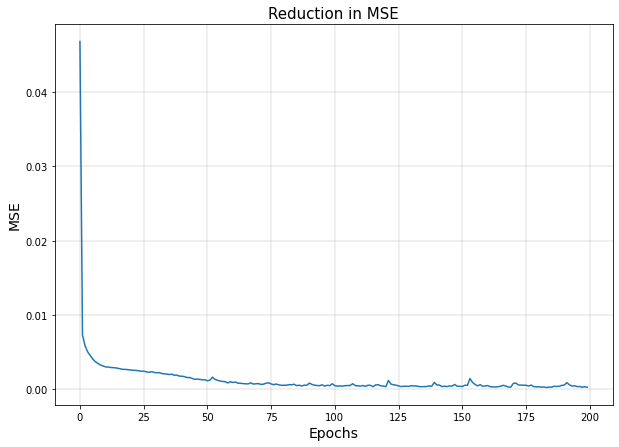

In [147]:
#VISUALIZING REDUCTION IN MSE
import matplotlib.pyplot as plt
plt.figure(figsize=[10,7])
plt.title('Reduction in MSE', fontsize =15)
plt.ylabel('MSE',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.grid(linewidth=0.4)
plt.plot(history.history['mean_squared_error'])
plt.show()

[[0.98853153]
 [0.8667434 ]
 [0.9607638 ]
 ...
 [0.9887503 ]
 [0.9886905 ]
 [0.96219176]]


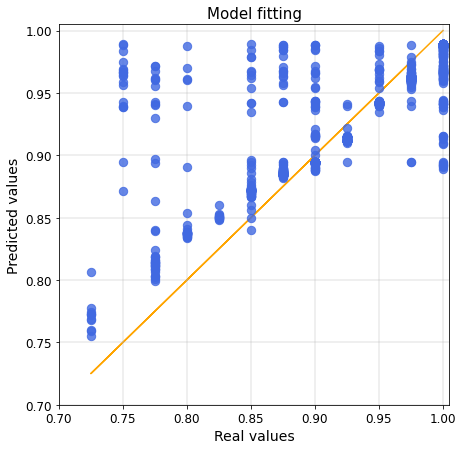

In [148]:
#VISUALIZATION FITTING
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
print(y_pred)

plt.figure(figsize=[7,7])
plt.title('Model fitting', fontsize =15)
plt.ylabel('Predicted values',fontsize=14)
plt.xlabel('Real values',fontsize=14)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.xlim([0.7,1.005])
plt.ylim([0.7,1.005])
plt.scatter(y_test, y_pred,linewidths=1, alpha=.8,s = 70, c='royalblue', zorder=2, label=None)
plt.plot(y_test,y_test, c='orange', zorder=1)
plt.grid(linewidth=0.4)
plt.show()